In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import consensus_score,classification_report



In [ ]:
!pip install tensorflow

In [ ]:
#keras imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank_note.csv')

In [ ]:
data.head(5)

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


**Data** **Preprocessing**

In [ ]:
x=data.drop("Class",axis=1)
y=data['Class']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

X_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)



In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
x_val=scaler.transform(x_val)

In [ ]:
X_train

array([[-0.37142703, -1.26011311,  0.52944169,  1.01095548],
       [-0.5841158 ,  1.33958678,  0.2081486 , -1.97053005],
       [-0.30426124, -0.32588623, -0.46194756,  0.72479504],
       ...,
       [ 1.31911882, -0.76117114,  0.12253984,  0.84550062],
       [-0.71262632, -0.10134354,  1.68591173,  0.97600991],
       [ 1.01821271, -1.04582678,  0.52310372,  0.45458873]])

In [ ]:

#Ensure target is in binary format(0,1 for binary classification)
#No need one-hot encoding in binary classification
y_train=y_train.values
y_test=y_test.values
y_val=y_val.values

In [ ]:
y_train.shape

(700,)

### **Build the ANN model**

In [ ]:
#Define model
model=Sequential(
    [
        Dense(64,activation='relu',input_shape=(X_train.shape[1],)),#input layer
        Dropout(0.3),#Dropout to reduce overfitting
        Dense(32,activation='relu'),#hidden layer
        Dropout(0.3),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')#output layer
    ]
)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    X_train,y_train,
    validation_data=(x_val,y_val),
    epochs=15,
    batch_size=12,
    callbacks=[early_stop]
)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6654 - loss: 0.6420 - val_accuracy: 0.8466 - val_loss: 0.4297
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8503 - loss: 0.4090 - val_accuracy: 0.9318 - val_loss: 0.1993
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9404 - loss: 0.2006 - val_accuracy: 0.9659 - val_loss: 0.0905
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9735 - loss: 0.0919 - val_accuracy: 0.9830 - val_loss: 0.0458
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9800 - loss: 0.0675 - val_accuracy: 0.9886 - val_loss: 0.0254
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9711 - loss: 0.0639 - val_accuracy: 0.9886 - val_loss: 0.0191
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9867 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9854 - loss: 0.0330 - val_accuracy: 1.0000 - val_loss:

# Evaluation

In [ ]:
model.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0030     


[0.0036105019971728325, 1.0]

In [ ]:
prediction=(model.predict(X_test)>0.5).astype(int)
print(classification_report(y_test,prediction))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        85

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

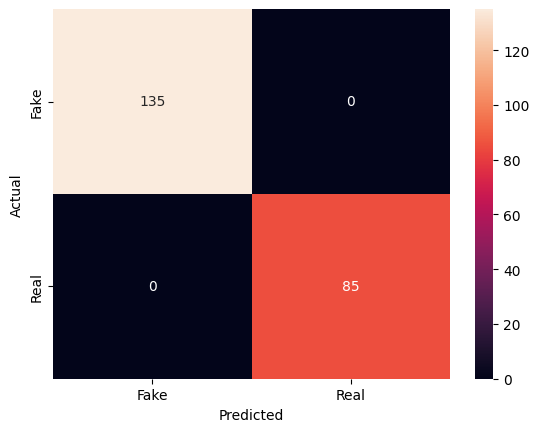

In [ ]:
cm=confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Prediction system**

In [ ]:
def make_prediction(input_data):
  input_data_scaled=scaler.transform(input_data)
  predictions=model.predict(input_data_scaled)
  predicted_class=(predictions>0.5).astype(int)
  if(predicted_class[0]==1):
    print("The note is real")
  else:
    print("The note is fake")

In [ ]:
input_data=np.array([[1.5,2.3,3.4,0.7]])
result=make_prediction(input_data)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The note is fake
None


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Save Model**

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))